In [15]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)

In [16]:
iris_data = datasets.load_iris()

In [17]:
X = pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns= ['Class'])

In [18]:
logistic_model = LogisticRegression(max_iter = 2000)

In [19]:
#k겹 교차검증-> cross_val_score(모델, X, y.values.ravel(),cv = 5) 여기서 cv는 k겹 갯수 
Z = cross_val_score(logistic_model, X, y.values.ravel(), cv= 5)

In [20]:
np.average(Z) #교차검증에 대한 평균 값 

0.9733333333333334

In [22]:
import pandas as pd 

gender_df = pd.read_csv('gender.csv')
X = pd.get_dummies(gender_df.drop(['Gender'], axis = 1)) #Gender 를 제외하고 원핫인코딩 해줌 
y = gender_df[['Gender']].values.ravel() #에러방지 

logistic_model = LogisticRegression(solver = 'saga', max_iter = 2000) #model 로 LogisticRegression 사용 
k_fold_score = np.average(cross_val_score(logistic_model,X,y,cv = 5)) #k겹 교차검증 사용 -> 5겹 

k_fold_score


0.531868131868132

러닝 모델을 학습시키기 전에 사람이 미리 정해줘야 되는 변수들을 하이퍼 파라미터라고 합니다. 

좋은 하이퍼 파라미터를 고르는 방법 중 하나는 그리드 서치라는 방법입니다.

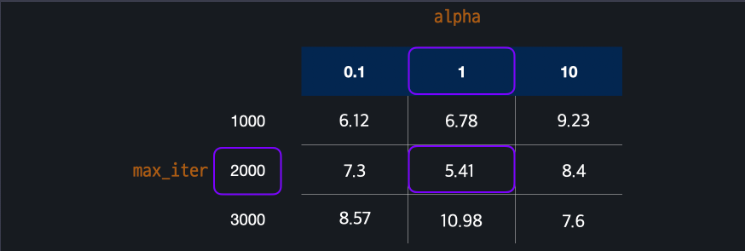

평균 제곱 오차근이 낮을수록 성능이 좋습니다.
그럼 이 행과 열에 해당하는 하이퍼 파라미터 값들을 선택하면 됩니다.

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from math import sqrt 

import numpy as np 
import pandas as pd 

In [25]:
admission_df = pd.read_csv("admission_data.csv")
X = admission_df.drop('Chance of Admit ', axis = 1)

polynomial_transform = PolynomialFeatures(2) #2차식 변형기를 정의한다. 
polynomial_features = polynomial_transform.fit_transform(X.values) #df -> 2차원 데이터로 변환 

features= polynomial_transform.get_feature_names(X.columns)

X = pd.DataFrame(polynomial_features,columns= features)
y = admission_df[['Chance of Admit ']]


In [26]:
hyper_parameter = {
    'alpha' : [0.01,0.1,1,10],
    'max_iter' : [10,500,1000,1500,2000]
}

In [27]:
lasso_model =Lasso()

In [30]:
#GridSearchCV(모델,하이퍼파라미터,cv = 숫자)
hyper_parameter_tuner = GridSearchCV(lasso_model,hyper_parameter ,cv = 5)

In [ ]:
hyper_parameter_tuner.fit(X,y) #Grid search로 학습 

In [32]:
hyper_parameter_tuner.best_params_ #최적의 하이퍼 파라미터 출력 -> 일일히 다 해볼 필요가 없다. 

{'alpha': 1, 'max_iter': 500}

In [33]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

import numpy as np 
import pandas as pd 

import warnings 
warnings.simplefilter(action= 'ignore')

gender_df = pd.read_csv("gender.csv")

#one - hot encoding 사용 -> pd.get_dummies(df)
X = pd.get_dummies(gender_df.drop(['Gender'],axis = 1)) #입력변수를 타겟변수인 Gender를 제외 하고 one -hot 인코딩 + 
y = gender_df[['Gender']].values.ravel() #타겟변수는 drop한 애를 df에서 가지고 오면 됨 

#하이퍼 파라미터 설정 
hyper_parameter = {
    'penalty': ['l1','l2'],
    'max_iter' : [500,1000,1500,2000]
}

#모델 만들기
model = LogisticRegression()

#그리드 서치 설정 -> 하이퍼 파라미터값들을 순차적으로 적용 시켜줌
# GridSearchCV(모델, 하이퍼파라미터, cv = 몇겹)
hyper_parameter_tuner = GridSearchCV(model,hyper_parameter,cv = 5)

#모델 학습 
hyper_parameter_tuner.fit(X,y)
#하이퍼 파라미터중 제일 좋은 값을 서치 
best_params = hyper_parameter_tuner.best_params_
best_params

{'max_iter': 500, 'penalty': 'l2'}